Auto reload

In [2]:
%load_ext autoreload
%autoreload 2

import statements

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch
import torchvision as vision
from torchvision import transforms
import torch.nn as nn

from data import ChristmasImages
from VGGmodel import VGGnet

from torch.utils import data


Data loader

In [2]:
training_set_path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/train'
validation_set_path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/evaluation/dataset/data'
batch_size_train = 256

training_set = ChristmasImages(training_set_path)
validation_set = ChristmasImages(validation_set_path)

data_loader_train  = data.DataLoader(training_set, batch_size = batch_size_train, shuffle = True)
data_loader_val = data.DataLoader(validation_set, batch_size=10, shuffle=True)



Visualing the data loader

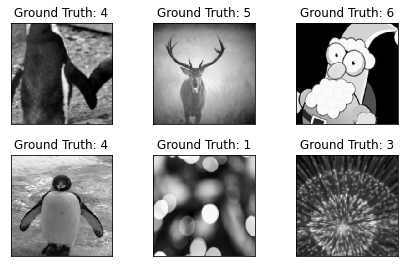

In [3]:
examples = enumerate(data_loader_train)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

Forward pass

In [3]:
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    network = VGGnet(in_channels=3, num_classes=8).to(device)
    print(network)
    ## N = 3 (Mini batch size)
    x = torch.randn(1, 3, 224, 224).to(device)
    print(network(x))


VGGnet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=(2, 2), stri

/Users/andrewkirubsingh/opt/anaconda3/envs/dl21/lib/python3.8/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss calculation

In [4]:
loss_fct = nn.CrossEntropyLoss()

Function for training

In [5]:
def train(epoch):
    network.train() # tells the network we are training now, affects behavior of dropout etc 
    for batch_idx, (data,target) in enumerate (data_loader_train):
        optimizer.zero_grad()
        output = network(data)
        loss = loss_fct(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(data_loader_train.dataset),
                100. * batch_idx / len(data_loader_train), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*batch_size_train) + ((epoch-1)*len(data_loader_train.dataset)))

Training

In [ ]:
n_epochs = 2
learning_rate = 0.1
momentum = 0.9
log_interval = 1

network = VGGnet(in_channels=3, num_classes=8)
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)


train_losses = []
train_counter = []

for epoch in range(1, n_epochs + 1):
    train(epoch)

Saving the model's weitghts

In [15]:
network.save_model()

Inference

utils.py

In [6]:
import torch
from torch.utils.data import Dataset
import csv
from data import ChristmasImages


class TestSet(Dataset):
    
    def __init__(self, path):
        super().__init__()
        self.dataset = ChristmasImages(path + '/data/val', training=False)
        
        with open(path + '/val.csv') as file:
            reader = csv.reader(file)
            next(reader)
            labels = {}
            for row in reader:
                labels[int(row[0])] = int(row[1])
        self.labels = labels

        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.dataset[idx][0]
        label = self.labels[idx]
        return image, label


def evaluate(model, loader):
    accuracy = 0.
    with torch.no_grad():
        for image, label in loader:
            _, prediction = model(image).max(dim=1)
            accuracy += (prediction == label).sum().item()
            print("{}: prediction: {},label: {}".format(i,prediction.item(),label.item()))

    accuracy /= len(loader)
    return accuracy*100


evaluate.py

NameError: name 'output' is not defined

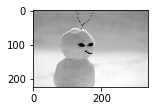

In [9]:
import torch
from torch.utils.data import DataLoader
from VGGmodel import VGGnet
from utils import TestSet, evaluate

# dataset location
path = '/Users/andrewkirubsingh/Desktop/Deeplearning/Challenge/evaluation/dataset'

model = VGGnet().eval()
model.load_state_dict(torch.load('pure_vgg_model'))

loader = DataLoader(TestSet(path), batch_size=1)

print(evaluate(model, loader))
